# Movie Posters


In [1]:
%pylab inline

import numpy as np
import scipy as sp
import pandas as pd
import urllib

import os
from os.path import join

Populating the interactive namespace from numpy and matplotlib


In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = (8,8)

### Loading an image into Python

We are now ready to read an image file into Python. We have several corpora that we
will be working with, but for now let's just read in a test
image I took of a teapot in my kitchen at home. To do this, we need to tell
Python where the image is: its in a directory called 'test', which is inside
a directory called 'images' and the file is called 'teapot.jpg'). Once we have
the filename, we can read in the image into Python with the function `imread`
as follows:

In [21]:
img_paths = [join("images", x) for x in os.listdir("images")]

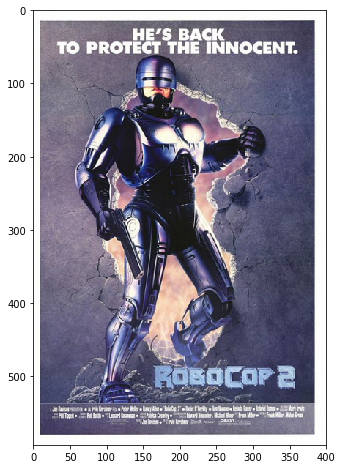

In [24]:
img = imread(img_paths[10])
plt.imshow(img)

In [25]:
df = pd.read_csv(join("meta", "workshop_data.csv"))

We can print out the pandas data frame object by including it in a cell
line all by itself.

In [26]:
df

,year,title,img,rating_count,gross,genre,rating,runtime,stars,metacritic,description
0,1980,Star Wars: Episode V - The Empire Strikes Back,1980_star_wars_episode_v__the_empire_strikes_b...,1101823,290480000.0,"Action, Adventure, Fantasy",PG,124.0,8.7,NaN,After the Rebels are brutally overpowered by t...
1,1980,Superman II,1980_superman_ii.jpg,94018,108190000.0,"Action, Adventure, Sci-Fi",PG,127.0,6.8,NaN,Superman agrees to sacrifice his powers to sta...
2,1980,Nine to Five,1980_nine_to_five.jpg,25807,103290000.0,Comedy,PG,109.0,6.8,58.0,"Three female employees of a sexist, egotistica..."
3,1980,Stir Crazy,1980_stir_crazy.jpg,23761,101300000.0,"Comedy, Crime",R,111.0,6.8,56.0,"Set up and wrongfully accused, two best friend..."
4,1980,Airplane!,1980_airplane.jpg,198432,83400000.0,Comedy,PG,88.0,7.7,NaN,A man afraid to fly must ensure that a plane l...
...,...,...,...,...,...,...,...,...,...,...,...
3675,2019,The Art of Self-Defense,2019_the_art_of_selfdefense.jpg,18474,2410000.0,"Comedy, Crime, Drama",R,104.0,6.7,NaN,"After being attacked on the street, a young ma..."
3676,2019,Luce,2019_luce.jpg,5800,1780000.0,Drama,R,109.0,6.8,NaN,A married couple is forced to reckon with thei...
3677,2019,The Other Side of Heaven 2: Fire of Faith,2019_the_other_side_of_heaven__fire_of_faith.jpg,259,1720000.0,"Adventure, Biography, Drama",PG-13,117.0,5.1,NaN,Missionary John H. Groberg returns to Tonga in...
3678,2019,The Aftermath,2019_the_aftermath.jpg,13203,1620000.0,"Drama, Romance, War",R,108.0,6.3,43.0,"Post World War II, a British colonel and his w..."


In [29]:
from dvt.core import DataExtraction, ImageInput
from dvt.annotate.cielab import CIElabAnnotator

In [118]:
dextra = DataExtraction(ImageInput(input_paths=img_paths))
dextra.run_annotators([CIElabAnnotator()])

KeyboardInterrupt: 

In [104]:
dt = dextra.get_json()

dt['cielab'][0]['dominant_colors']

['#020305', '#4e3125', '#94634c', '#bfb1a5', '#18100f']

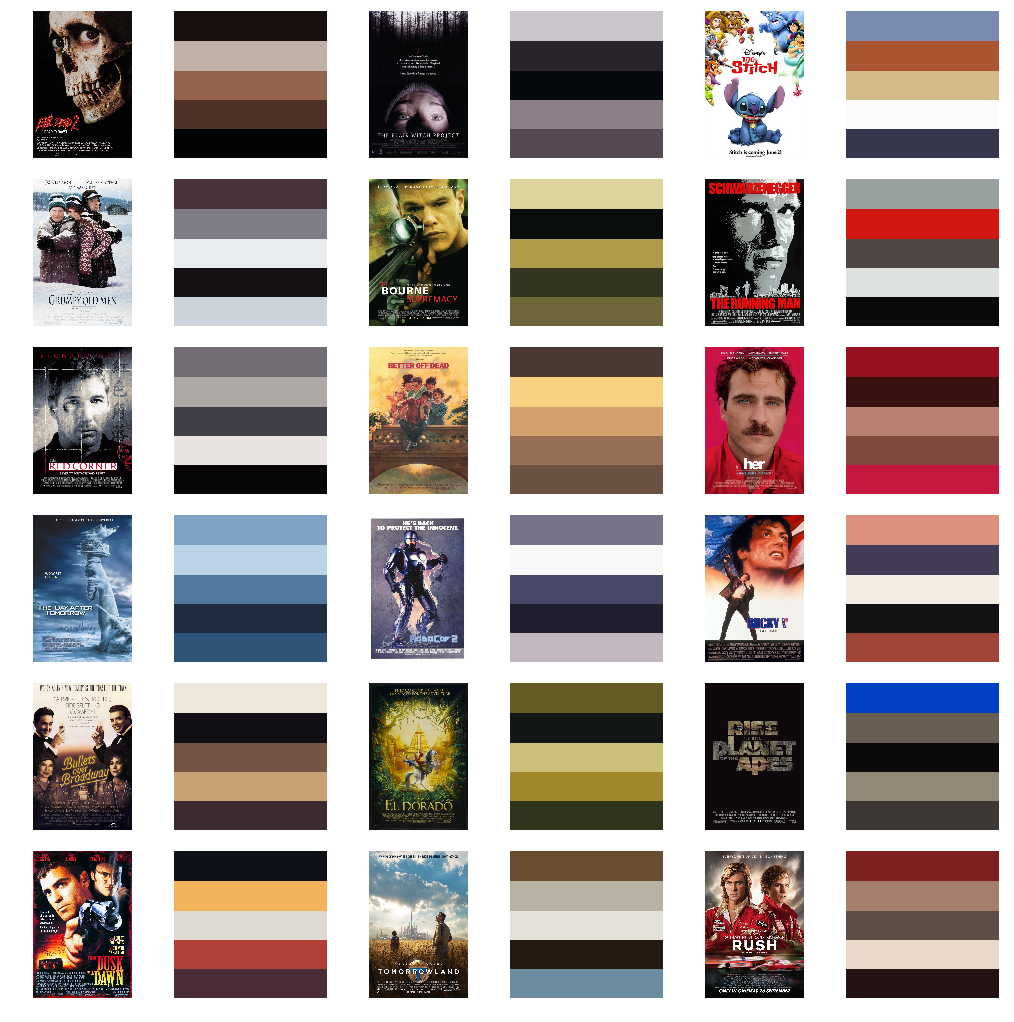

In [113]:
plt.figure(figsize=(14, 14))

nx = 6
ny = 6

pnum = 1
for img_num in range(18):
    img = imread(img_paths[img_num])
    plt.subplot(ny, nx, pnum)
    plt.imshow(img)
    plt.axis("off")
    pnum += 1
    
    ax = plt.subplot(ny, nx, pnum)
    for j, cn in enumerate(dt['cielab'][img_num]['dominant_colors']):
        circ = plt.Rectangle((0, j  / 5), 1, 0.2, color=cn)
        ax.add_artist(circ)
        plt.axis("off")
        
    pnum += 1
    
plt.tight_layout(pad=0)